# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images.

*Note: All images come from the [AMOS dataset](https://mvrl.cse.wustl.edu/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [2]:
!rm -rf DL_Data_sets/
!git clone --branch images https://github.com/octavio-navarro/DL_Data_sets.git

Cloning into 'DL_Data_sets'...
remote: Enumerating objects: 64969, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (491/491), done.
remote: Total 64969 (delta 13), reused 493 (delta 9), pack-reused 64469 (from 1)
Receiving objects: 100% (64969/64969), 1.54 GiB | 33.68 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [3]:
import cv2
import os, glob

import numpy as np
import matplotlib.pyplot as plt

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets.

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

- image_dir_training: the directory where our training image data is stored
- image_dir_test: the directory where our test image data is stored

In [4]:
# Image data directories
image_dir_training = "DL_Data_sets/images/day_night_images/training/"
image_dir_test = "DL_Data_sets/images/day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night").

This function loads in images and their labels and places them in a list. The list contains all images and their associated labels. For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list

In [5]:
def load_dataset(image_dir) -> list[tuple[np.ndarray, str]]:

    # Populate this empty image list
    im_list = []
    image_types = ["day", "night"]

    # Iterate through each color folder
    for im_type in image_types:

        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):

            # Read in the image
            im = cv2.imread(file)

            # added rgb img conversion
            img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((img_rgb, im_type))

    return im_list

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index:
``` IMAGE_LIST[0][:]```.

In [6]:
# Load training data
IMAGE_LIST: list[tuple[np.ndarray, str]] = load_dataset(image_dir_training)

## Visualize sample day and night images

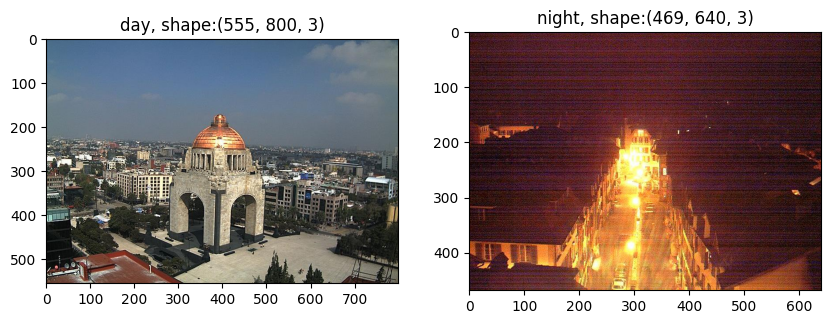

In [7]:
# Select an image and its label by list index
image_index = 6
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

day_image, night_image = None, None

for image in IMAGE_LIST:
    if image[1] == "day":
        day_image = image

        break

for image in IMAGE_LIST:
    if image[1] == "night":
        night_image = image
        break


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title(f'{day_image[1]}, shape:{day_image[0].shape}')
ax1.imshow(day_image[0])

ax2.set_title(f'{night_image[1]}, shape:{night_image[0].shape}')
ax2.imshow(night_image[0])


## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [8]:
## Standardize the output using both functions above, standardize the input images and output labels
def standardize(image_list: list[tuple[np.ndarray, str]], std_x: int = 900, std_y:int = 600) ->list[tuple[np.ndarray, int]]:

    # Empty image data array
    standard_list: list[tuple[np.ndarray, int]] = []

    # Iterate through all the image-label pairs
    for item in image_list:
        img = cv2.resize(item[0], (std_x, std_y))
        standard_list.append((img, 1 if item[1] == "day" else 0))

        # Resize the image to a specific width and height using cv2.resize

        # Create a numerical label based on the string label of the image: day should be 1, night should be 0

        # Append the image, and it's label to the full, processed list of image data


    return standard_list

In [9]:
# Standardize all training images

STANDARDIZED_LIST: list[tuple[np.ndarray, int]] = standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: ((600, 900, 3))
Label [1 = day, 0 = night]: 1


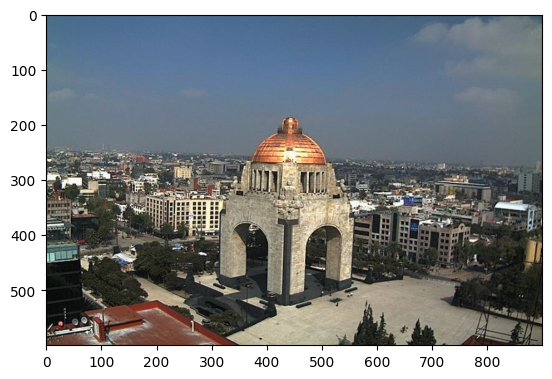

In [10]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print(f"Shape: ({selected_image.shape})")
print(f"Label [1 = day, 0 = night]: {selected_label}")

# Feature Extraction
---

Create a feature that best represents a day or night image. Preprocess the image as you see fit.


In [11]:
# plot day and night images in each channel for each colorspace, to see how can we built features for our classifier

from cv2.typing import MatLike
import random


def get_random_image(image_list: list[tuple[np.ndarray, int]], is_day=True) -> tuple[np.ndarray, int]:
    return random.choice([image for image in image_list if image[1] == is_day])


def image_colorspaces_visualization(img_rgb: MatLike):
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)

    rgb = cv2.split(img_rgb)
    hsv = cv2.split(img_hsv)
    hls = cv2.split(img_hls)


    plt.imshow(img_rgb)
    plt.show()

    for space, name in zip([rgb, hsv, hls], ["rgb", "hsv", "hls"]):
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

        ax1.set_title(name[0])
        ax1.imshow(space[0], cmap='gray')

        ax2.set_title(name[1])
        ax2.imshow(space[1], cmap='gray')

        ax3.set_title(name[2])
        ax3.imshow(space[2], cmap='gray')


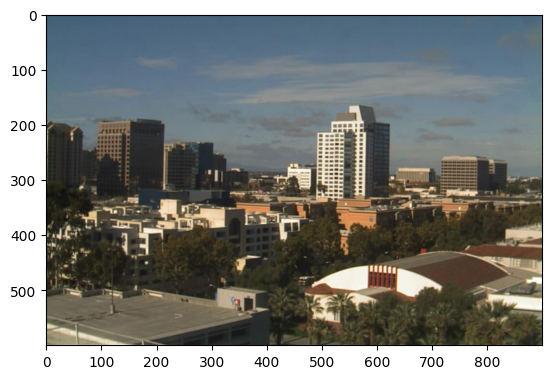

S avg: 67.70568703703704
V avg: 108.42023333333333


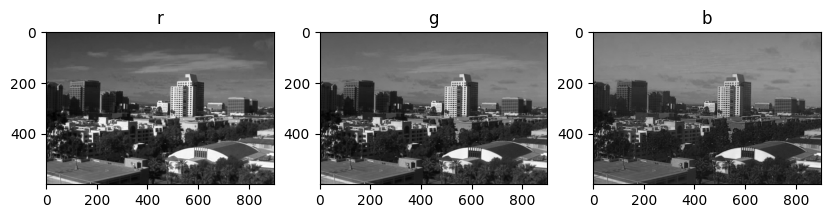

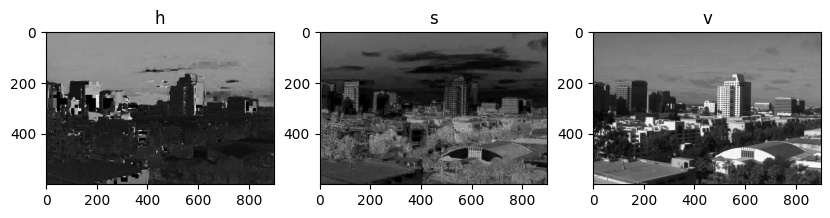

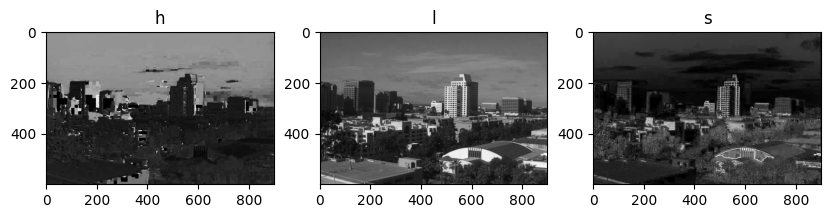

In [12]:
# day image spaces visualization

day_image = get_random_image(STANDARDIZED_LIST, is_day=True)

image_colorspaces_visualization(day_image[0])
h, s, v = cv2.split(cv2.cvtColor(day_image[0], cv2.COLOR_RGB2HSV))
print("S avg:", np.average(s))
print("V avg:", np.average(v))



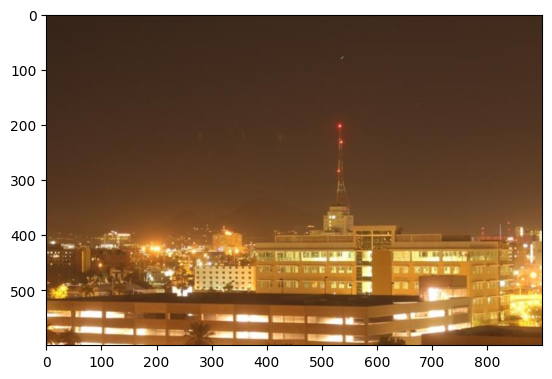

S avg: 154.99154814814815
V avg: 113.00514074074074


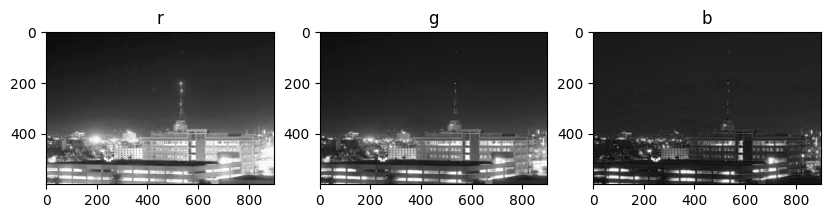

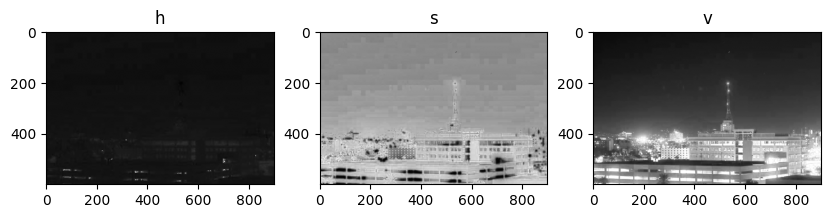

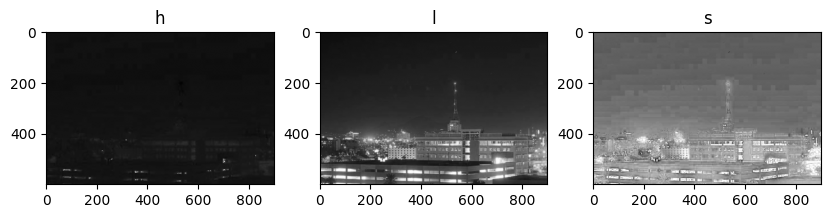

In [13]:
# night image spaces visualization

night_image = get_random_image(STANDARDIZED_LIST, is_day=False)

image_colorspaces_visualization(night_image[0])
h, s, v = cv2.split(cv2.cvtColor(night_image[0], cv2.COLOR_RGB2HSV))
print("S avg:", np.average(s))
print("V avg:", np.average(v))

## Colorspace channels visual analysis

By inspecting many random day and night images, I've seen that two channels that seem being different bewteen day and night images, are the "s" and "v" on hsv. Saturation channel looks dark in day images, and bright in might images. For value channel, it looks more consistently light and dark on day and night images respectively.


I think I'm gonna take an avg of every pixel of these two channels in images as a feature to train a classifier for day/night images.

In [14]:
from cv2.typing import MatLike

def feature_extraction(rgb_image: MatLike) -> tuple[float, float]:
    h, s, v = cv2.split(cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV))
    return np.average(s), np.average(v)


def prepare_vectors(std: list[tuple[np.ndarray, int]]) -> tuple[list, list]:
    features = []
    labels = []

    for image in std:
        features.append(feature_extraction(image[0]))
        labels.append(image[1])

    return features, labels

# Classification and Visualizing Error

In this section, we'll turn feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

---
### Build a complete classifier

Propose a classifier, and use it to create a model that classifies images into night and day. Include metrics that evaluate the performance of your model.

In [15]:
# train data prep
crude_train_img_list: list[tuple[np.ndarray, str]] = load_dataset(image_dir_training)
std_train_img_list = standardize(crude_train_img_list)
X_train, y_train = prepare_vectors(std_train_img_list)

In [16]:
# TODO: Create a classifier for the night and day images. Include plots to show the metrics of the perfomance of the model.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook.

### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [17]:
# test data prep

crude_test_img_list: list[tuple[np.ndarray, str]] = load_dataset(image_dir_test)
std_test_img_list = standardize(crude_test_img_list)
X_test, y_test = prepare_vectors(std_test_img_list)

Test your model on all the images from the test data. Add all the misclassified images to a new list.

In [18]:
# Test your model and save the misclasified images to a new list.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

misclassified = []
for i, (real, pred) in enumerate(zip(y_test, y_pred)):
    if real != pred:
        misclassified.append((std_test_img_list[i], pred))

print(f"\nTotal misclassified: {len(misclassified)}")

Accuracy: 0.95625
F1: 0.9559748427672956

Confusion Matrix:
 [[77  3]
 [ 4 76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96        80
           1       0.96      0.95      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160


Total misclassified: 7


---
### Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify.

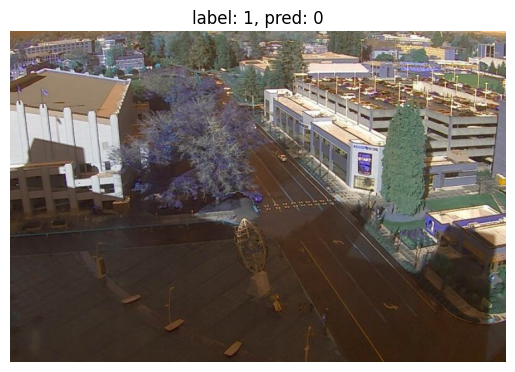

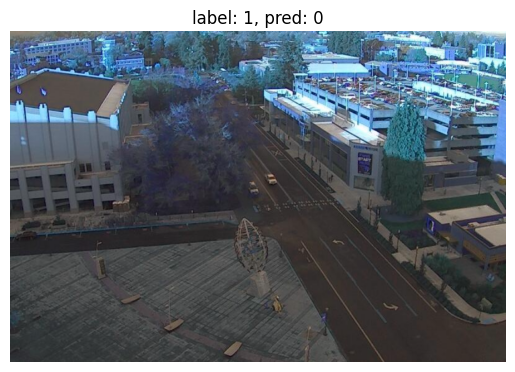

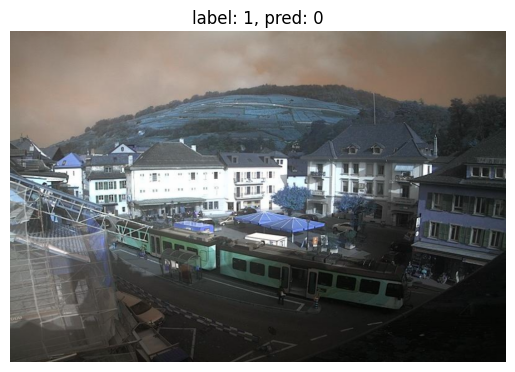

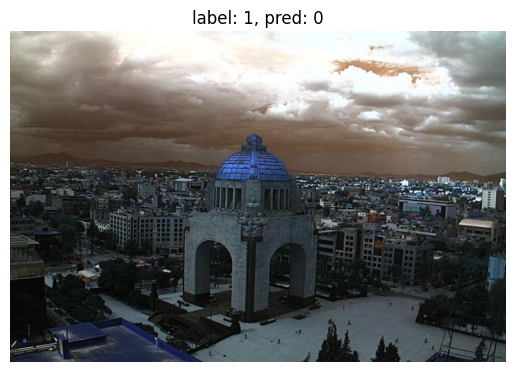

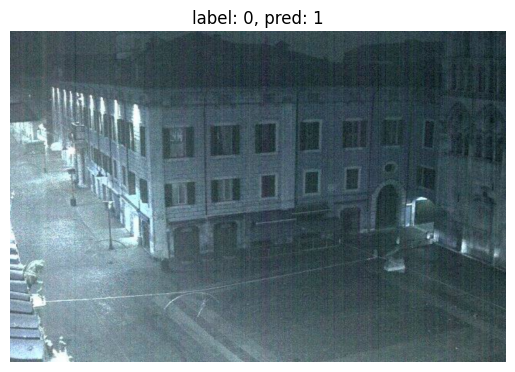

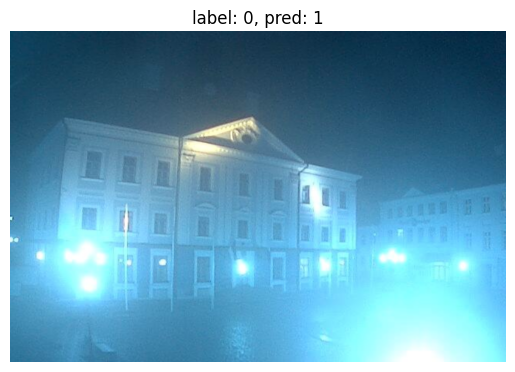

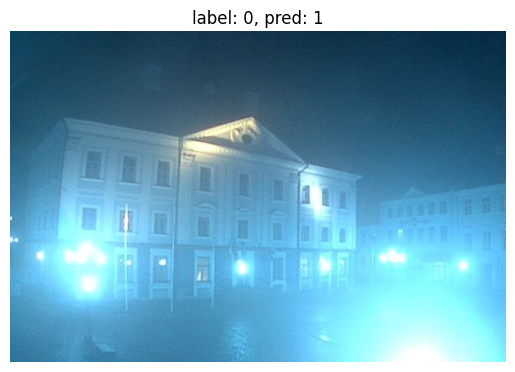

In [19]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified ass



for img, pred in misclassified:
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.title(f"label: {img[1]}, pred: {pred}")
    plt.axis('off')
    plt.show()




## Insights and findings

I can say gratefully that my ML LR day/night images classifier classifies images with more than 95% accuracy and F1-score.

7 images were classified incorrectly, by ploting this images, it can be seen that some of this images were taken at a noon time, having less difference in their saturation and vue, because of the sunset. Also the other image that was not classified well, was a night image with a lot of lightness, that could make the saturation and vue look like a day image.

Building this model, I learned that for building image recognition ML models it is not necesary to onvolve all pixels or perform massive operations among them, neither train a NN, for some problems it is enough by decomposing each image to find patterns among its properties and build a feature set based on those, to develop a solution using a classic ML algorithm.